<a href="https://colab.research.google.com/github/MUbarak123-56/animal-recognition/blob/master/model_training_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 9.9 MB/s 
     |████████████████████████████████| 120 kB 53.8 MB/s 
     |████████████████████████████████| 6.6 MB 48.1 MB/s 


In [3]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 8.2 MB/s 
     |████████████████████████████████| 431 kB 55.1 MB/s 
     |████████████████████████████████| 1.3 MB 36.7 MB/s 
     |████████████████████████████████| 115 kB 55.1 MB/s 
     |████████████████████████████████| 212 kB 52.2 MB/s 
     |████████████████████████████████| 127 kB 61.6 MB/s 
Mounted at /content/gdrive


In [5]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [6]:
from transformers import pipeline

In [7]:
path = Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10')

In [ ]:
fns = get_image_files(path)
fns

In [9]:
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [10]:
dls = pic.dataloaders(path)

In [11]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

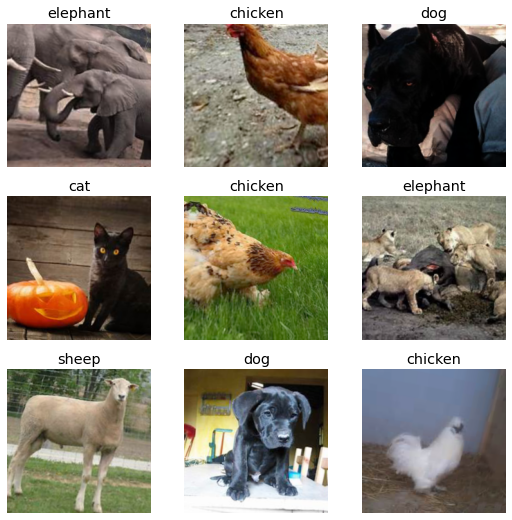

In [12]:
#dls = ImageDataLoaders.from_name_func(path, fnames = get_image_files(path), valid_pct=0.2, label_func=lambda x: x[0].isupper(),item_tfms=Resize(224))
dls.show_batch()

In [15]:
!pip install huggingface_hub["fastai"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#from huggingface_hub import from_pretrained_fastai
#model = from_pretrained_fastai("espejelomar/fastai-pet-breeds-classification")

Downloading:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/963 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/87.6M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.0 [00:00<?, ?B/s]

There is no `pyproject.toml` in the repository that contains the fastai `Learner`. The `pyproject.toml` would allow us to verify that your fastai and fastcore versions are compatible with those of the model you want to load.


In [19]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


TypeError: ignored

In [ ]:
learn50.fine_tune(2)

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses()

In [ ]:
interp50 = ClassificationInterpretation.from_learner(learn50)
interp50.plot_confusion_matrix()